# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [26]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager

In [27]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [28]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url="https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [29]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [30]:
# Find the first table element with class 'table' on the page
data_table = soup.find('table', class_='table')

# Extract the table contents as a Pandas DataFrame
data_df = pd.read_html(str(data_table))[0]

# Do something with the DataFrame, e.g. print the first few rows
print(data_df.head())

   id terrestrial_date  sol   ls  month  min_temp  pressure
0   2       2012-08-16   10  155      6     -75.0     739.0
1  13       2012-08-17   11  156      6     -76.0     740.0
2  24       2012-08-18   12  156      6     -76.0     741.0
3  35       2012-08-19   13  157      6     -74.0     732.0
4  46       2012-08-20   14  157      6     -74.0     740.0


In [33]:
# Extract all rows of data
mars_weather = soup.find_all('table')
mars_weather = pd.read_html(str(data_table))[0]
mars_weather

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [34]:
# Loop through the rows and extract the weather data from the second row
for row in rows:
    cells = row.find_all('td')
    if len(cells) > 1 and cells[0].text.strip() == 'Mars Weather':
        mars_weather = cells[1].text.strip()
        break

print(mars_weather)

        id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]


In [35]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather = pd.read_html(str(data_table))[0]
mars_weather

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [36]:
# Examine data type of each column
mars_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [38]:
# Change data types for data analysis
mars_weather['id']=mars_weather['id'].astype(int)
mars_weather['terrestrial_date']=pd.to_datetime(mars_weather['terrestrial_date'])
mars_weather['sol']=mars_weather['sol'].astype(int)
mars_weather['ls']=mars_weather['ls'].astype(int)
mars_weather['month']=mars_weather['month'].astype(int)
mars_weather['min_temp']=mars_weather['min_temp'].astype(float)
mars_weather['pressure']=mars_weather['pressure'].astype(float)

In [39]:
# Confirm type changes were successful by examining data types again
mars_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 73.1 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [46]:
# 1. How many months are there on Mars?
mars_months = mars_weather['month'].nunique()
mars_months

12

In [48]:
# 2. How many Martian days' worth of data are there?
maritian_days = mars_weather['sol'].nunique()
maritian_days

1867

In [49]:
# 3. What is the average low temperature by month?
low_temp = mars_weather.groupby(['month'])['min_temp'].mean()
low_temp = low_temp.to_frame()
low_temp = low_temp.reset_index()
low_temp

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


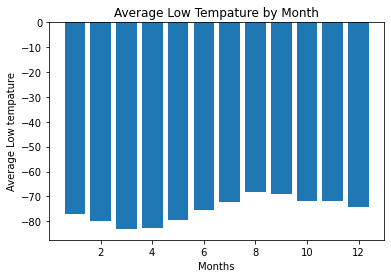

In [51]:
# Plot the average temperature by month
plt.bar(low_temp['month'] , low_temp['min_temp'])
plt.xlabel('Months')
plt.ylabel('Average Low tempature')
plt.title('Average Low Tempature by Month')
plt.show()

In [52]:
# Identify the coldest and hottest months in Curiosity's location

low_temp = low_temp.sort_values(by='min_temp')
low_temp

,month,min_temp
2,3,-83.307292
3,4,-82.747423
1,2,-79.932584
4,5,-79.308725
0,1,-77.160920
5,6,-75.299320
11,12,-74.451807
6,7,-72.281690
10,11,-71.985507
9,10,-71.982143


In [53]:
# 4. Average pressure by Martian month
avg_pressure = mars_weather.groupby('month')['pressure'].mean()
avg_pressure = avg_pressure.to_frame()
avg_pressure = avg_pressure.reset_index()
avg_pressure = avg_pressure.rename(columns={'pressure':'Average Pressure'})
avg_pressure


,month,Average Pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


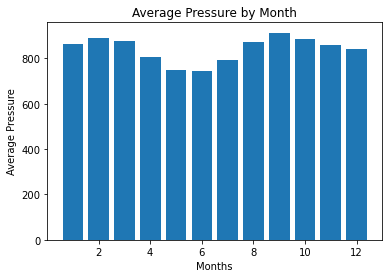

In [54]:
# Plot the average pressure by month
plt.bar(avg_pressure['month'] , avg_pressure['Average Pressure'])
plt.xlabel('Months')
plt.ylabel('Average Pressure')
plt.title('Average Pressure by Month')
plt.show()

In [58]:
# 5. How many terrestrial (earth) days are there in a Martian year?

print(f'There are 687 Earth Days in a Martian Year')


There are 687 Earth Days in a Martian Year


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [59]:
# Write the data to a CSV
mars_weather.to_csv('mars_weather',  encoding='utf8', index=False , )

In [ ]:
browser.quit()